<a href="https://colab.research.google.com/github/Abdullahali77/NTI_ML/blob/main/Adult_NB_Classification_Abdullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df = pd.read_csv('adult.csv', names=col_names)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
print(df['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


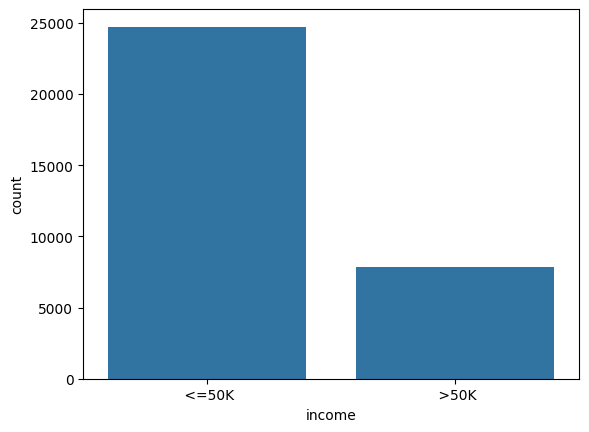

In [8]:
sns.countplot(x='income', data=df)
plt.show()

In [9]:
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)

In [10]:
df['income_val'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [11]:
df['income'].isna().sum()

np.int64(0)

In [12]:
df['income_val'].isna().sum()

np.int64(0)

In [13]:
numerical = df[df.columns[df.dtypes != 'object']]
numerical.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_val'],
      dtype='object')

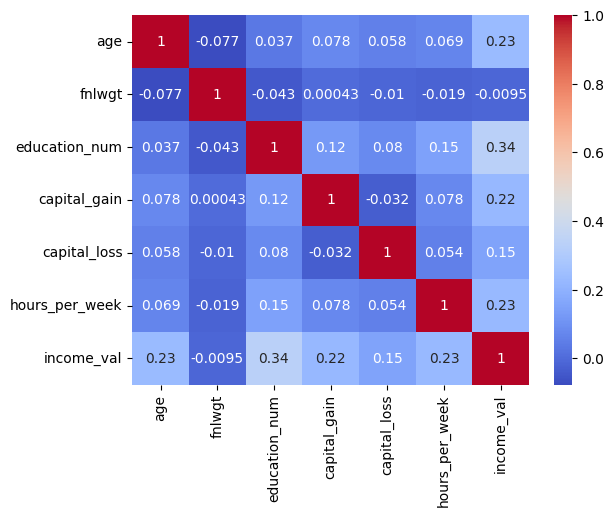

In [14]:
# corr
corr = numerical.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [15]:
categorical_cols = df[df.columns[df.dtypes == 'object']]
categorical_cols.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [16]:
# value conuts
for col in categorical_cols:
    print(f'{col}: {df[col].nunique()}')

workclass: 9
education: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native_country: 42
income: 2


In [17]:
target = df['income']

In [18]:
from sklearn.metrics import mutual_info_score
mi_scores = {}
for col in categorical_cols:
    mi_scores[col] = mutual_info_score(df[col], target)
mi_series = pd.Series(mi_scores).sort_values(ascending=False)
print(mi_series)

income            0.552011
relationship      0.114623
marital_status    0.108497
education         0.064872
occupation        0.064409
sex               0.025765
workclass         0.014952
native_country    0.006027
race              0.005807
dtype: float64


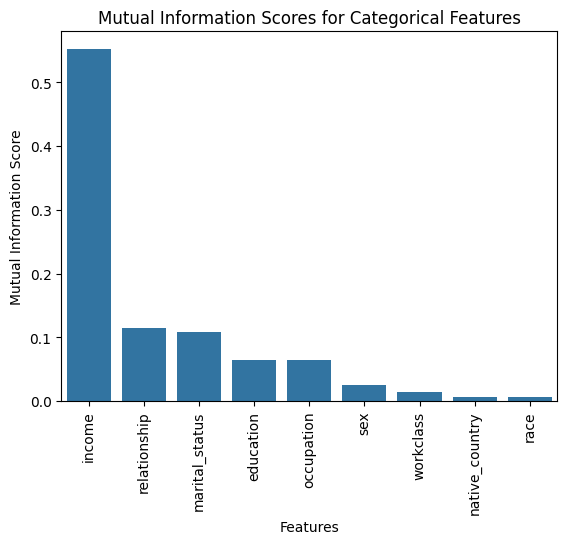

In [19]:
# plot
sns.barplot(x=mi_series.index, y=mi_series.values)
plt.xticks(rotation=90)
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.title('Mutual Information Scores for Categorical Features')
plt.show()

/tmp/ipython-input-20-2642268158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


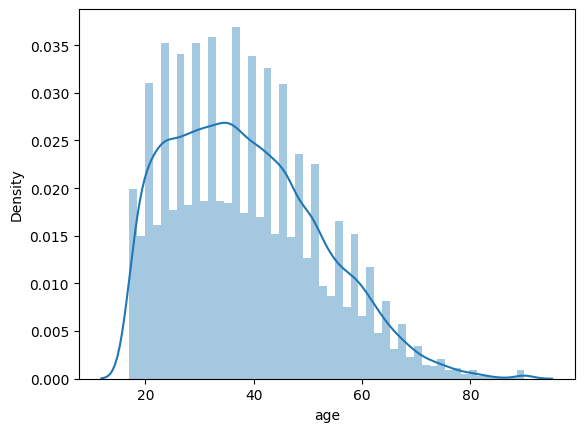

/tmp/ipython-input-20-2642268158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


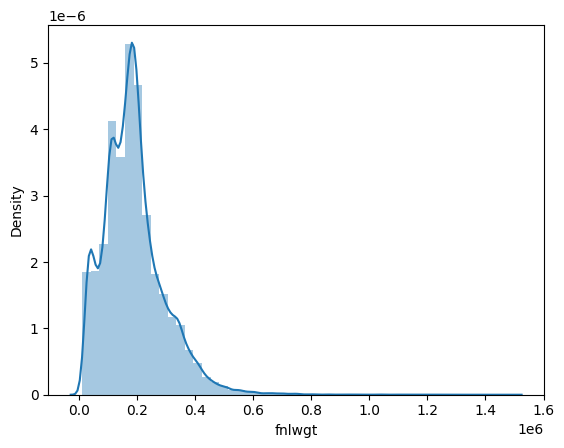

/tmp/ipython-input-20-2642268158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


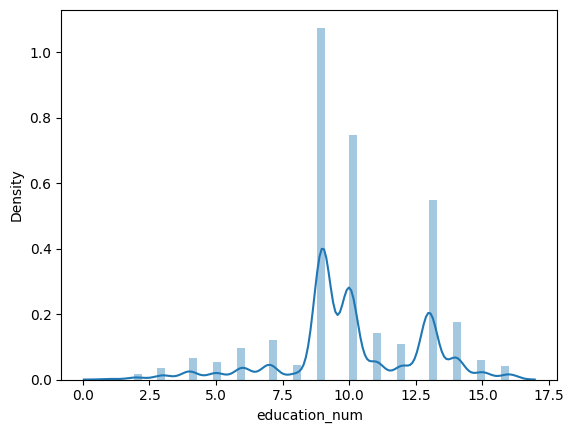

/tmp/ipython-input-20-2642268158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


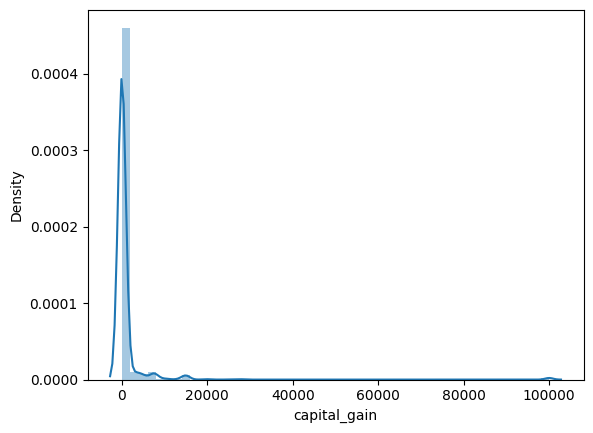

/tmp/ipython-input-20-2642268158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


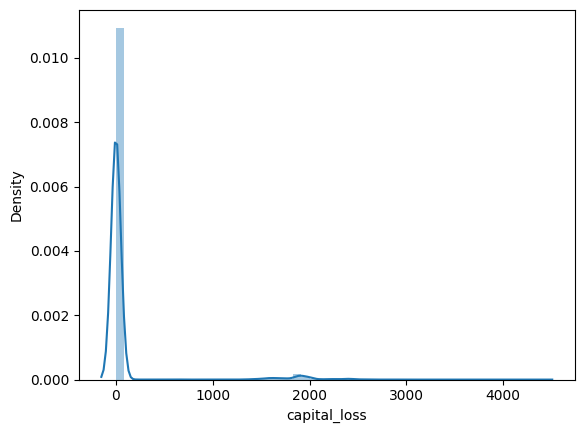

/tmp/ipython-input-20-2642268158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


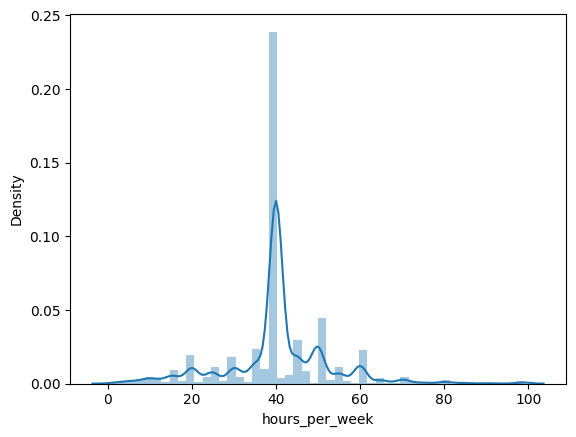

In [20]:
for col in numerical.columns:
  if col != 'income_val':
      sns.distplot(df[col])
      plt.show()

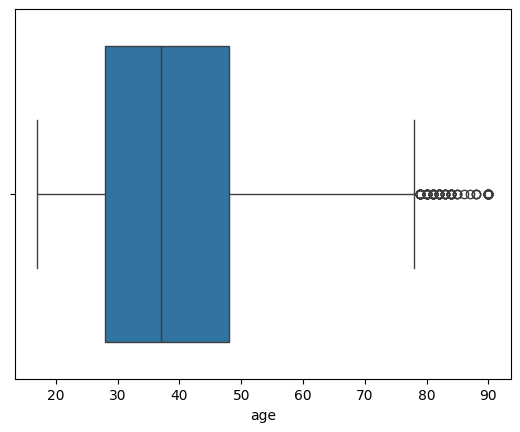

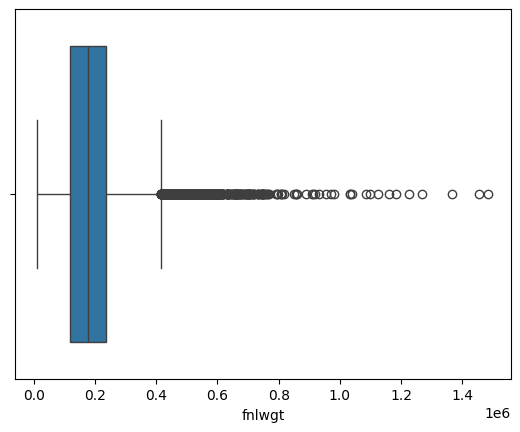

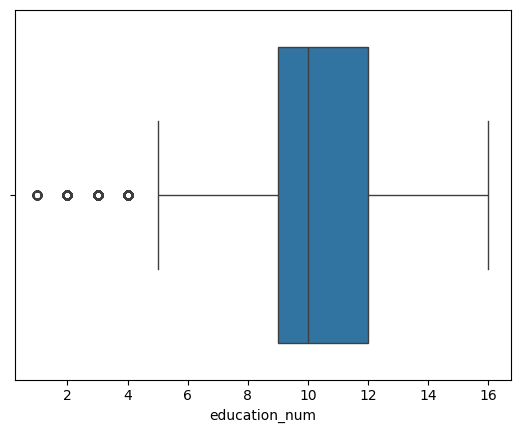

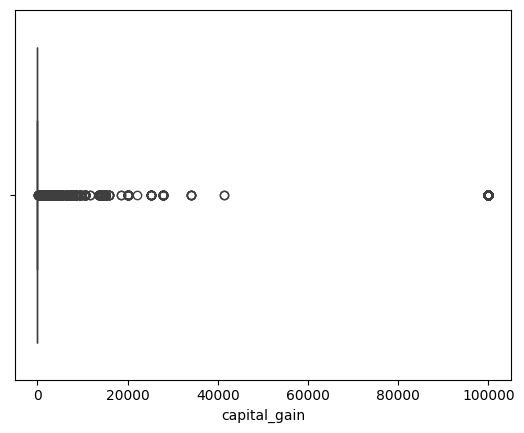

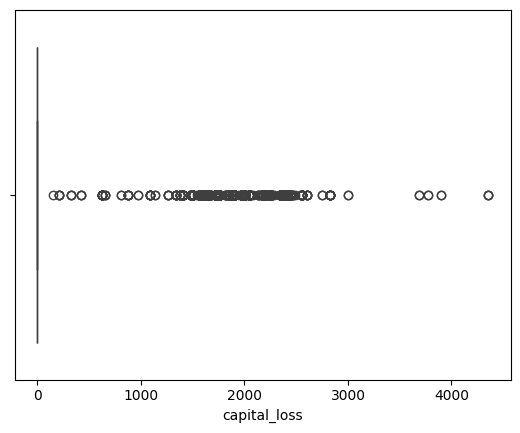

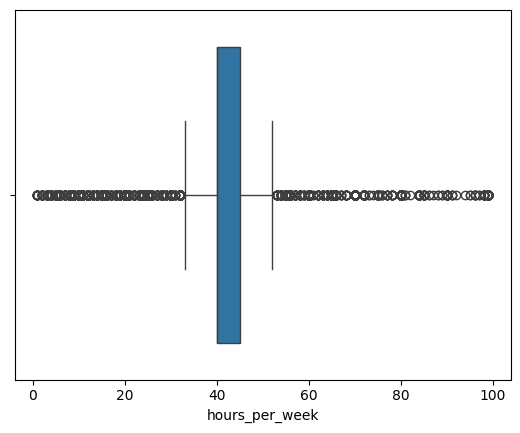

In [21]:
# box plots
for col in numerical.columns:
  if col != 'income_val':
        sns.boxplot(x=df[col])
        plt.show()

In [22]:
# split data
from sklearn.model_selection import train_test_split
X = df.drop(['income', 'income_val'], axis=1)
y = df['income_val']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
Numerical columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

# Categorical preprocessing
cat_preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols)
], remainder='drop')

# Numerical preprocessing
num_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols)
], remainder='drop')

# Pipelines
cat_pipe = Pipeline([
    ('preprocessor', cat_preprocessor),
    ('classifier', CategoricalNB())
])

num_pipe = Pipeline([
    ('preprocessor', num_preprocessor),
    ('classifier', GaussianNB())
])

# Combined voting model
mixed_model = VotingClassifier(
    estimators=[
        ('cat', cat_pipe),
        ('num', num_pipe)
    ],
    voting='soft'
)

# Fit model on your training data
mixed_model.fit(X_train, y_train)


VotingClassifier(estimators=[('cat',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('cat',
                                                                                OrdinalEncoder(),
                                                                                ['workclass',
                                                                                 'education',
                                                                                 'marital_status',
                                                                                 'occupation',
                                                                                 'relationship',
                                                                                 'race',
                                                                                 'sex',
                                                                                 'native_country'])])),
                                              ('classifier',
                                               CategoricalNB())])),
                             ('num',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                StandardScaler(),
                                                                                ['age',
                                                                                 'fnlwgt',
                                                                                 'education_num',
                                                                                 'capital_gain',
                                                                                 'capital_loss',
                                                                                 'hours_per_week'])])),
                                              ('classifier', GaussianNB())]))],
                 voting='soft')

In [25]:
y_pred = mixed_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4942
           1       0.75      0.44      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.80      0.70      0.73      6513
weighted avg       0.82      0.83      0.81      6513



In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4716  226]
 [ 878  693]]


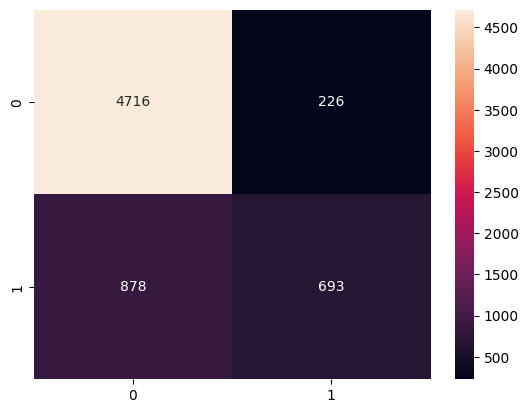

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [30]:
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred))


ROC AUC Score:
0.6976949160226804


In [31]:
def build_model(classifier):
    preprocessor = ColumnTransformer([
        ('cat', OrdinalEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    return pipeline

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

logreg_model = build_model(LogisticRegression())
knn_model = build_model(KNeighborsClassifier())
svm_model = build_model(SVC())

In [38]:
logreg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
# svm_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week'])])),
                ('classifier', KNeighborsClassifier())])

In [50]:
y_pred = logreg_model.predict(X_test)

In [51]:
print("\nClassification Report logreg:")
print(classification_report(y_test, y_pred))


Classification Report logreg:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.72      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513



In [52]:
print(confusion_matrix(y_test, y_pred))

[[4657  285]
 [ 854  717]]


In [53]:
print(roc_auc_score(y_test, y_pred))

0.6993641196504532


In [54]:
y_pred = knn_model.predict(X_test)

In [55]:
print("\nClassification Report knn:")
print(classification_report(y_test, y_pred))


Classification Report knn:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4942
           1       0.66      0.57      0.61      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.82      0.82      6513



In [56]:
print(confusion_matrix(y_test, y_pred))

[[4471  471]
 [ 672  899]]


In [57]:
print(roc_auc_score(y_test, y_pred))

0.7384707160670396


In [58]:
svm_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week'])])),
                ('classifier', SVC())])

In [59]:
y_pred = svm_model.predict(X_test)

In [60]:
print("\nClassification Report svm:")
print(classification_report(y_test, y_pred))


Classification Report svm:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4942
           1       0.86      0.26      0.40      1571

    accuracy                           0.81      6513
   macro avg       0.84      0.63      0.65      6513
weighted avg       0.82      0.81      0.77      6513



In [61]:
print(confusion_matrix(y_test, y_pred))

[[4876   66]
 [1157  414]]


In [63]:
print(roc_auc_score(y_test, y_pred))

0.6250857496288583


In [64]:
# DT
from sklearn.tree import DecisionTreeClassifier
dt_model = build_model(DecisionTreeClassifier())

In [65]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week'])])),
                ('classifier', DecisionTreeClassifier())])

In [66]:
y_pred = dt_model.predict(X_test)

In [67]:
print("\nClassification Report dt:")
print(classification_report(y_test, y_pred))


Classification Report dt:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4942
           1       0.61      0.63      0.62      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.75      6513
weighted avg       0.82      0.81      0.81      6513



In [68]:
print(confusion_matrix(y_test, y_pred))

[[4301  641]
 [ 578  993]]


In [69]:
print(roc_auc_score(y_test, y_pred))

0.7511884518595207
